In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy import optimize

In [28]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = '2018_01_11_14_27_49_cs-loading-scan-Iz'
exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
cuts = [[1],[28]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined


In [29]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [30]:
retention = q.apply_thresholds()

In [31]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	-0.16	retention:0.048 +- 0.011
ivar:	-0.15	retention:0.048 +- 0.011
ivar:	-0.14	retention:0.084 +- 0.015
ivar:	-0.13	retention:0.100 +- 0.016
ivar:	-0.12	retention:0.167 +- 0.020
ivar:	-0.11	retention:0.092 +- 0.015
ivar:	-0.10	retention:0.072 +- 0.014
ivar:	-0.09	retention:0.052 +- 0.012
ivar:	-0.08	retention:0.052 +- 0.012
ivar:	-0.07	retention:0.016 +- 0.007
ivar:	-0.06	retention:0.036 +- 0.010


In [32]:
q.save_experiment_data()

In [33]:
def gaussian(x, a, x0, s, b):
    return b + a*np.exp(-0.5*((x-x0)/s)**2)

<IPython.core.display.Javascript object>


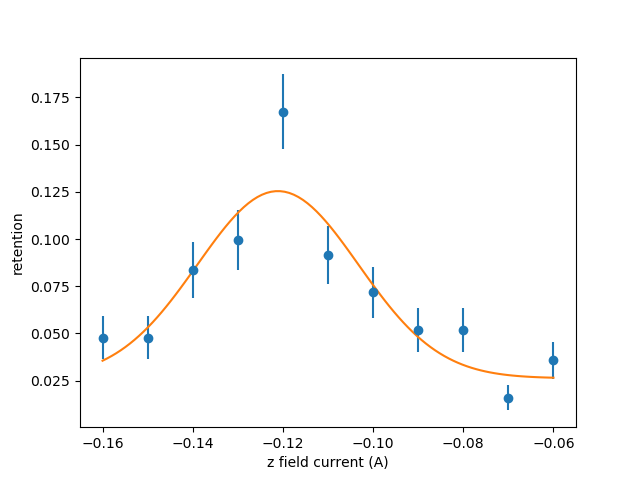

[ 0.09906858 -0.12110532  0.01787537  0.02630579]


In [35]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'o'
    )
#ax.set_ylim(-0.01, 0.3)
ax.set_xlabel(xlab)

guess = [0.1, -0.11, 0.005, 0.0]
for e in range(len(retention['ivar'])):
    popt, pcov = optimize.curve_fit(
        gaussian,
        retention['ivar'][e],
        retention['retention'][e],
        p0=guess,
        sigma=retention['error'][e]
    )
    xs = np.linspace(min(retention['ivar'][e]),max(retention['ivar'][e]),100)
    ax.plot(xs, gaussian(xs, *popt))
    fit_data = "a: {:.3f}\nx0: {:.4f}\ns: {:.3f}\nb: {:.3f}"
    ax.text(0.01, 0.7, fit_data.format(*popt), fontsize=12)

ax.set_ylabel('retention')
print(popt)
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'gaussian_retention_fit.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)